# Predicting Food Loss in Agricultural Production and Post-Harvest Stages Using Temperature Changes, Nutrient Balance, Crop Yield, Pesticide Use, and Consumer Price Indices

### Objective: 
- The goal of this project is to predict food loss and understand the significance of each factor. Why do we want to predict food loss?
    - Mitigating food insecurity: We can enable policymakers to optimize food distribution.
    - Environmental sustainability: [Food loss and waste account for 8-10% of annual global greenhouse gas emissions](https://unfccc.int/news/food-loss-and-waste-account-for-8-10-of-annual-global-greenhouse-gas-emissions-cost-usd-1-trillion)
    - Reduce financial loss: Reduction of production losses incurred by farmers.
    - Policy/planning: We can enable businesses and governments to implement interventions and shape food policies.

### Factors To Explore 

- **Temperature Changes**: Can affect crop growth, harvest timing, and spoilage rates, influencing overall food loss.  
- **Cropland Nutrient Balance**: Nutrient deficiencies can reduce yield and quality.  
- **Crop Yield**: Direct indicator of agricultural productivity; lower yields often lead to higher relative losses. Measured pre-loss to avoid data leakage. 
- **Pesticide Use**: Controls pests and diseases but excessive or insufficient use may impact crop health and lead to losses.  
- **Consumer Price Indices**: CPI reflects economic conditions. Price fluctuations can drive overproduction or underutilization, leading to waste. Food is heavily weighted in CPI.  


### Datasets:
- **Source:** FAO [(Food and Agriculture Organization of the United Nations)](https://www.fao.org/faostat/en/#data).
    - Environment Temperature Change
    - Cropland Nutrient
    - Pesticide Input
    - Crop Production
    - Crop Loss
    - Consumer Price Indices
- **Years Covered:** 2010–2022.

### Importing the Data

In [56]:
import pandas as pd
import csv

In [57]:
# Load the datasets
food_balance_df = pd.read_csv('raw_data/SUA_Crops_Livestock_E_All_Data_NOFLAG.csv', encoding='latin1')
cpi_df = pd.read_csv('raw_data/ConsumerPriceIndices_E_All_Data_NOFLAG.csv', encoding='latin1')
crop_nutrient_df = pd.read_csv('raw_data/Environment_Cropland_nutrient_budget_E_All_Data_NOFLAG.csv', encoding='latin1')
temp_change_df = pd.read_csv('raw_data/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin1')
pest_df = pd.read_csv('raw_data/Inputs_Pesticides_Use_E_All_Data_NOFLAG.csv', encoding='latin1')
crop_yield_df = pd.read_csv('raw_data/Production_Crops_Livestock_E_All_Data_NOFLAG.csv', encoding='latin1')

### A. Food Balance Data

#### Exploring, Cleaning, and Transforming Food Balance Data

In [58]:
food_balance_df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y2010,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5113,Opening stocks,t,6720.01,...,7812.47,8058.20,8115.52,8125.10,7942.00,7659.44,7381.02,7587.22,7765.31,8031.89
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,t,56000.00,...,42215.00,27400.00,24246.00,32843.00,27291.00,34413.00,38205.00,39307.00,64256.00,64000.00
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5610,Import quantity,t,NaN,...,NaN,34.46,75.50,309.16,910.36,822.20,1585.37,1780.42,1730.48,2730.47
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5071,Stock Variation,t,368.85,...,245.73,57.32,9.58,-183.10,-282.56,-278.43,206.20,178.09,266.57,239.36
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5910,Export quantity,t,778.00,...,1924.00,2284.00,2815.00,7344.00,8803.00,9532.00,1943.13,2546.00,4488.41,5034.98


In [59]:
print("Number of areas:", food_balance_df['Area'].nunique())
print("Number of area codes:", food_balance_df['Area Code'].nunique())
print("Number of area codes (M49):", food_balance_df['Area Code (M49)'].nunique())

Number of areas: 224
Number of area codes: 224
Number of area codes (M49): 224


>The number of area codes matches the number areas so we can ensure that these are unique. First, we will filter this dataframe to focus on the losses element.

In [60]:
# Filter for losses category
food_balance_df = food_balance_df[food_balance_df['Element'] == 'Loss']

In [61]:
food_balance_df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y2010,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
5,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5016,Loss,t,3012.02,...,2270.58,1473.74,1304.10,1766.49,1467.87,1850.94,2110.50,2179.30,3496.22,3535.64
47,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5016,Loss,t,510.00,...,625.00,1075.00,900.00,900.25,974.52,921.81,1448.11,1079.29,1338.23,1310.70
86,2,'004,Afghanistan,515,'01341,Apples,5016,Loss,t,5012.38,...,6582.42,7487.41,7515.05,11800.49,14656.08,22567.28,18948.05,20350.86,24991.62,24641.09
100,2,'004,Afghanistan,526,'01343,Apricots,5016,Loss,t,1996.80,...,2700.00,2700.00,2630.58,536.82,3955.09,3272.58,3881.64,3953.64,6224.70,5115.24
189,2,'004,Afghanistan,44,'0115,Barley,5016,Loss,t,65464.79,...,76999.77,77000.15,59999.85,44000.04,13999.98,9475.26,19000.00,19000.00,10000.00,16615.72


>Here we can observe that the metric for losses is tonnes.

In [62]:
print("Number of item categories:", food_balance_df['Item'].nunique())
print("Number of item category codes:", food_balance_df['Item Code'].nunique())
print("Number of item category codes (FBS):", food_balance_df['Item Code (CPC)'].nunique())

Number of item categories: 314
Number of item category codes: 314
Number of item category codes (FBS): 314


>There are 314 unique item categories 314 item codes so these are unique.

In [63]:
food_balance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22888 entries, 5 to 1014548
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code        22888 non-null  int64  
 1   Area Code (M49)  22888 non-null  object 
 2   Area             22888 non-null  object 
 3   Item Code        22888 non-null  int64  
 4   Item Code (CPC)  22888 non-null  object 
 5   Item             22888 non-null  object 
 6   Element Code     22888 non-null  int64  
 7   Element          22888 non-null  object 
 8   Unit             22888 non-null  object 
 9   Y2010            15390 non-null  float64
 10  Y2011            15403 non-null  float64
 11  Y2012            15491 non-null  float64
 12  Y2013            15488 non-null  float64
 13  Y2014            17176 non-null  float64
 14  Y2015            17164 non-null  float64
 15  Y2016            17081 non-null  float64
 16  Y2017            17060 non-null  float64
 17  Y2018          

>The only columns that contain null data are the year categories. Let's see how many rows total have null columns.

In [64]:
rows_with_nan = food_balance_df[food_balance_df.isna().any(axis=1)]
len(rows_with_nan)

8379

>There 8379 entries that have at lease one null column. Since loss balances vary significantly due to varying crop yields for countries of different sizes, we will simply drop the null data instead of using imputation.

In [65]:
food_balance_df = food_balance_df.dropna()
food_balance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14509 entries, 5 to 1014517
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code        14509 non-null  int64  
 1   Area Code (M49)  14509 non-null  object 
 2   Area             14509 non-null  object 
 3   Item Code        14509 non-null  int64  
 4   Item Code (CPC)  14509 non-null  object 
 5   Item             14509 non-null  object 
 6   Element Code     14509 non-null  int64  
 7   Element          14509 non-null  object 
 8   Unit             14509 non-null  object 
 9   Y2010            14509 non-null  float64
 10  Y2011            14509 non-null  float64
 11  Y2012            14509 non-null  float64
 12  Y2013            14509 non-null  float64
 13  Y2014            14509 non-null  float64
 14  Y2015            14509 non-null  float64
 15  Y2016            14509 non-null  float64
 16  Y2017            14509 non-null  float64
 17  Y2018          

>We still have plenty of data as we are left with **14,509** entries. Summary statistics will also be reviewed.

In [66]:
food_balance_df.describe()

,Area Code,Item Code,Element Code,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
count,14509.000000,14509.000000,14509.0,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04,1.450900e+04
mean,1630.161072,470.145841,5016.0,1.562229e+05,1.619232e+05,1.670976e+05,1.739943e+05,1.810695e+05,1.836138e+05,1.851877e+05,1.923317e+05,1.899032e+05,2.072596e+05,1.987010e+05,2.026604e+05,2.080969e+05
std,2374.691676,291.300777,0.0,1.785856e+06,1.849456e+06,1.861909e+06,1.963090e+06,1.978862e+06,2.010045e+06,2.041790e+06,2.110451e+06,2.036231e+06,2.287973e+06,2.083830e+06,2.059209e+06,2.131875e+06
min,1.000000,15.000000,5016.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,97.000000,234.000000,5016.0,1.859400e+02,1.935200e+02,1.977000e+02,2.071500e+02,2.110400e+02,2.169300e+02,2.168000e+02,2.207300e+02,2.212000e+02,2.100800e+02,2.144700e+02,2.201500e+02,2.162500e+02
50%,176.000000,426.000000,5016.0,2.070180e+03,2.163700e+03,2.182550e+03,2.222090e+03,2.272180e+03,2.346820e+03,2.356350e+03,2.427630e+03,2.481220e+03,2.381440e+03,2.429930e+03,2.539940e+03,2.507000e+03
75%,5102.000000,574.000000,5016.0,1.941407e+04,1.964570e+04,1.999203e+04,2.051050e+04,2.108699e+04,2.162535e+04,2.209295e+04,2.262791e+04,2.318864e+04,2.308025e+04,2.307892e+04,2.374223e+04,2.357914e+04
max,5817.000000,1242.000000,5016.0,1.119634e+08,1.164093e+08,1.169517e+08,1.234794e+08,1.207816e+08,1.219182e+08,1.237787e+08,1.312868e+08,1.231688e+08,1.264271e+08,1.247277e+08,1.216281e+08,1.233941e+08


>The unit for losses is 1000t (thousand tonnes). The standard deviation ranges from $1.734372 \times 10^6$ tonnes to $2.024015 \times 10^6$ tonnes across the years 2010 to 2022. The minimum is **0** with a maximum as high as $1.312868 \times 10^8$ tonnes. We will not assume high losses are outliers as countries with higher populations may have higher losses and using this data may help our model make more accurate predictions. We will look further at countries with high losses.

In [67]:
# Get unique country names
food_balance_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghan

>This list of areas shows that there may be overlapping data. For example, Southern Asia is included as a region while the data separately includes data for South Asian countries like India.

>We will drop areas that are composed of several countries since they are already included separately in the data. Since this will also need to be performed on other dataframes, we will define a function. We will use the list of unique contries to drop any regions that appear after Zimbabwe since it is the last country in the list.

In [68]:
import numpy as np

def drop_regions(foa_array):
    # Get unique countries
    new_array = foa_array.copy()
    word_array = new_array['Area'].unique()
    # Extract index of where the word "World" starts
    index = np.where(word_array == 'World')[0][0]
    # Get all regions after world
    regions_to_drop = word_array[index: ]
    # Drop regions
    new_df = new_array[~new_array['Area'].isin(regions_to_drop)]

    return new_df

In [69]:
food_balance_final_df = drop_regions(food_balance_df)

# Print regions to check multiple regions were dropped
print(food_balance_final_df['Area'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq

In [70]:
print("Remaining rows:", len(food_balance_final_df))

Remaining rows: 10360


>We have successful removed entries that cover multiple countries and have **10,360** rows remaining.

>Lastly, since this data will be combined with other dataframes, we want to create the a column for the food losses associated with each item type as well as a column to store the year for each entry. Then we will drop separate year columns. This will make the data more usable for the analysis.

In [71]:
# Melt the DataFrame to consolidate year columns into a single 'YEAR' column
food_balance_final = food_balance_final_df.melt(
    id_vars=['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)', 'Item', 'Element Code', 'Element', 'Unit'],
    value_vars=[col for col in food_balance_final_df.columns if col.startswith('Y')],
    var_name='YEAR',
    value_name='Losses'
)

# Extract the year from the 'YEAR' column
food_balance_final['YEAR'] = food_balance_final['YEAR'].str.extract(r'(\d{4})')

In [72]:
food_balance_final.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,YEAR,Losses
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5016,Loss,t,2010,3012.02
1,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5016,Loss,t,2010,510.00
2,2,'004,Afghanistan,515,'01341,Apples,5016,Loss,t,2010,5012.38
3,2,'004,Afghanistan,526,'01343,Apricots,5016,Loss,t,2010,1996.80
4,2,'004,Afghanistan,44,'0115,Barley,5016,Loss,t,2010,65464.79


In [73]:
print("Rows:", len(food_balance_final))

Rows: 134680


>Now the food balance data is prepared. We have successfully dropped the large regions and are left with **134,680** entries. We can begin cleaning the rest of the data frames using our defined function and methods.

### B. CPI Data

#### Exploring, Cleaning and Transforming CPI Data

In [74]:
cpi_df.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Months Code,Months,Unit,...,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023,Y2024
0,2,'004,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,Value,7001,January,NaN,...,102.473425,103.618233,108.520050,114.527725,114.054183,120.880724,128.251956,153.851465,158.736219,134.812977
1,2,'004,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,Value,7002,February,NaN,...,100.599141,103.967168,108.701492,113.437296,113.597099,120.900114,127.332161,155.173082,159.969363,136.976084
2,2,'004,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,Value,7003,March,NaN,...,99.388333,104.236245,114.689456,112.827883,115.785785,121.659358,127.699447,155.096341,158.795801,136.956544
3,2,'004,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,Value,7004,April,NaN,...,99.195658,104.779901,114.595556,111.659316,117.371378,136.811308,130.335891,161.336283,156.018562,137.079517
4,2,'004,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,Value,7005,May,NaN,...,99.034873,104.226511,115.403680,111.214302,119.044418,134.430757,132.280617,163.012382,153.477296,135.885663


In [75]:
cpi_df['Item'].unique()

array(['Consumer Prices, Food Indices (2015 = 100)',
       'Consumer Prices, General Indices (2015 = 100)',
       'Food price inflation',
       'Consumer Prices, Food Indices (2015 = 100), median',
       'Consumer Prices, Food Indices (2015 = 100), weighted average',
       'Consumer Prices, General Indices (2015 = 100), median',
       'Consumer Prices, General Indices (2015 = 100), weighted average',
       'Food price inflation, median',
       'Food price inflation, weighted average'], dtype=object)

>There are several variable we can use but we will focus on using **CPI for food** and **food price inflation**. One of the many factors that contribute to food loss is price volatility. Food can remain unharvested if the cost of production increases while the cost of food deflates. [Food ranks 2nd in the relative importance of expenditure categories in the consumer price index](https://www.bls.gov/cpi/tables/relative-importance/weight-update-comparison-2024.htm) so this will be a useful metric.

>We'll also drop the multiple region categories before reviewing summary statistics.

In [76]:
cpi_df = drop_regions(cpi_df)

In [77]:
cpi_df.describe()

,Area Code,Item Code,Element Code,Months Code,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,...,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023,Y2024
count,7356.000000,7356.000000,7356.000000,7356.000000,4872.000000,7284.000000,7284.000000,7284.000000,7284.000000,7284.000000,...,7356.000000,7344.000000,7292.000000,7.248000e+03,7.248000e+03,7.221000e+03,7.107000e+03,7.065000e+03,6.978000e+03,2.967000e+03
mean,129.373573,23012.993475,6123.675367,7006.500000,50.903566,38.955773,39.284933,40.445631,41.864164,43.788822,...,68.635643,74.297599,88.030137,6.625902e+03,1.201984e+06,4.741053e+07,4.464524e+08,1.271300e+09,5.688274e+09,9.086426e+09
std,76.640715,0.817857,1.882647,3.452287,22.207685,34.010055,29.636198,30.024654,30.357789,30.856315,...,45.853677,63.054219,225.084013,2.405967e+05,2.803361e+07,1.264315e+09,8.491621e+09,2.393689e+10,1.001280e+11,1.444130e+11
min,1.000000,23012.000000,6121.000000,7001.000000,0.668677,-22.711720,-23.768201,-17.528390,-14.079912,-14.386460,...,-14.280908,-10.364805,-9.009141,-2.000000e+01,-1.082474e+01,-9.498156e+00,-1.226058e+01,-2.498299e+01,-1.837805e+01,-1.644655e+01
25%,63.000000,23012.000000,6121.000000,7003.750000,32.128375,7.539514,7.774047,7.596956,7.789388,8.953759,...,5.891923,5.928301,5.888750,4.820857e+00,5.512410e+00,7.094266e+00,8.065496e+00,1.630124e+01,1.419938e+01,6.796288e+00
50%,128.000000,23013.000000,6125.000000,7006.500000,55.686920,36.991287,38.335890,40.653198,44.282409,48.043971,...,99.194279,99.978797,101.321436,1.027067e+02,1.036000e+02,1.048000e+02,1.070611e+02,1.145549e+02,1.211418e+02,1.255117e+02
75%,193.000000,23014.000000,6125.000000,7009.250000,69.749282,67.085998,68.422768,69.427397,70.216603,72.163312,...,100.317331,102.882458,106.104792,1.091415e+02,1.129087e+02,1.168918e+02,1.216859e+02,1.360804e+02,1.462600e+02,1.510475e+02
max,299.000000,23014.000000,6125.000000,7012.000000,99.414010,634.979723,213.838986,133.269762,102.429095,101.827964,...,315.017012,953.574367,11086.187138,1.594700e+07,1.288889e+09,6.719865e+10,2.547020e+11,9.103803e+11,2.482022e+12,2.701769e+12


>There appears to be some significant outliers in the data. In the year 2019 column, the max reported is $1.288889 \times 10^9$
while the minimum is $-1.082474 \times 10^1$ and median is $1.036000 \times 2^1$. We will explore this further.

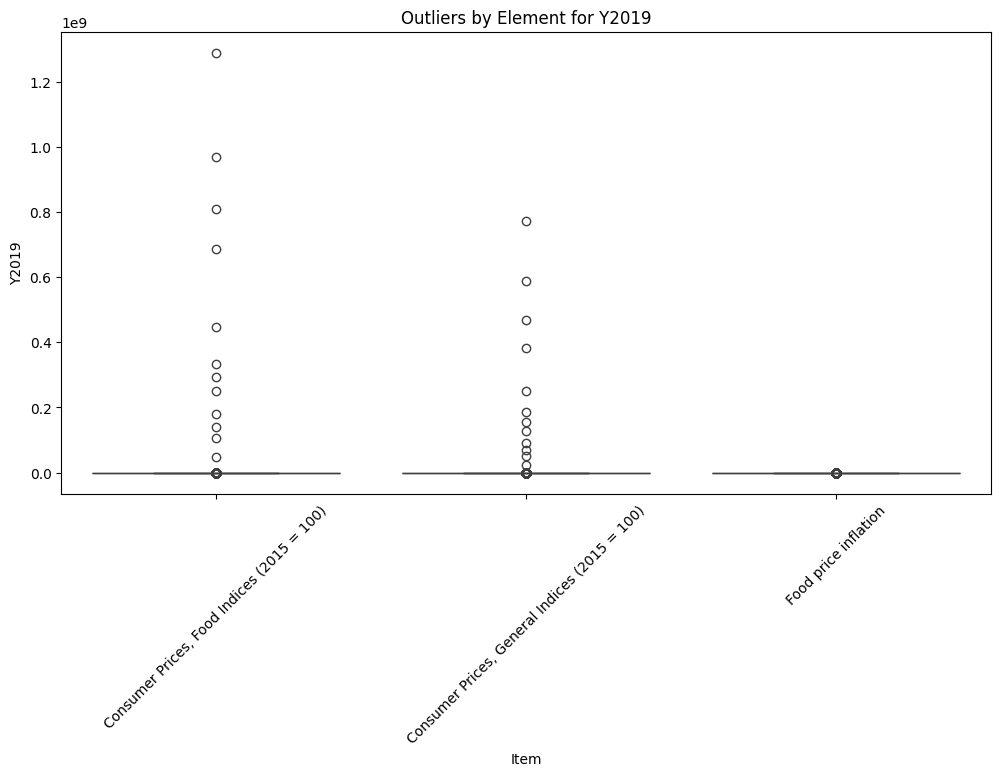

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers by Element
plt.figure(figsize=(12, 6))
sns.boxplot(data=cpi_df, x='Item', y='Y2019')
plt.xticks(rotation=45)
plt.title('Outliers by Element for Y2019')
plt.show()

>As we we see here, this graph is so skewed by outliers that we cannot see the interquartile range from the boxplot. Countries such as Venezuela that have experienced [economic and political turmoil](https://apnews.com/article/business-venezuela-caribbean-global-trade-c7287fc7f4ed22103dba930e71bb1572) are skewing our data.

In [79]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7356 entries, 0 to 7355
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code        7356 non-null   int64  
 1   Area Code (M49)  7356 non-null   object 
 2   Area             7356 non-null   object 
 3   Item Code        7356 non-null   int64  
 4   Item             7356 non-null   object 
 5   Element Code     7356 non-null   int64  
 6   Element          7356 non-null   object 
 7   Months Code      7356 non-null   int64  
 8   Months           7356 non-null   object 
 9   Unit             2436 non-null   object 
 10  Y2000            4872 non-null   float64
 11  Y2001            7284 non-null   float64
 12  Y2002            7284 non-null   float64
 13  Y2003            7284 non-null   float64
 14  Y2004            7284 non-null   float64
 15  Y2005            7284 non-null   float64
 16  Y2006            7284 non-null   float64
 17  Y2007            72

>The years 2000 and 2024 have the most missing data. We will drop these columns instead of the rows as well as columns for year 2001 through 2009 since the food balance data starts from 2010.

>First, we will melt this dataframe for ease of use so that we can filter outliers.

In [80]:
# Drop year columns
cpi_df = cpi_df.drop(columns=['Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2024'])

>We will use the IQR method to remove any entries with outliers and then fill in empty cells with the mean of its column

In [81]:
# Select year columns
year_columns = [col for col in cpi_df.columns if col.startswith('Y')]

# Function to filter outliers within each Element group
def filter_outliers(group):
    Q1 = group[year_columns].quantile(0.25)
    Q3 = group[year_columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter within bounds for each year
    return group[
        ((group[year_columns] >= lower_bound) & (group[year_columns] <= upper_bound)).all(axis=1)
    ]

# Apply filtering to each Element category
cpi_df = cpi_df.groupby('Element', group_keys=False).apply(filter_outliers, include_groups=False)

In [82]:
# Fill in missing rows with the mean of its rcolumn
cpi_df = cpi_df.fillna(cpi_df[['Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 
                        'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
                        'Y2022', 'Y2023']].mean(), axis=0)

In [83]:
cpi_df.describe()

,Area Code,Item Code,Element Code,Months Code,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,124.949440,23013.011959,6123.624281,7006.474569,56.134161,60.284784,62.194979,63.846319,65.052763,66.861134,68.536419,70.950677,72.530417,74.585301,77.478134,80.908996,91.740497,98.934146
std,74.325472,0.822107,1.900216,3.450158,38.926464,39.479146,41.750853,43.416766,44.977692,45.920488,47.408316,49.147657,51.206971,52.737158,54.446258,57.690577,61.927184,70.570115
min,1.000000,23012.000000,6121.000000,7001.000000,-17.076821,-11.153759,-14.012171,-10.989717,-13.688525,-14.280908,-10.364805,-9.009141,-20.000000,-10.824742,-9.498156,-12.260582,-8.970378,-14.543546
25%,61.000000,23012.000000,6121.000000,7003.000000,6.217908,8.665786,6.555462,5.986869,5.299763,5.145655,4.712781,4.945505,4.163641,4.683671,5.919232,6.924288,15.254294,13.203368
50%,122.000000,23013.000000,6125.000000,7006.000000,75.884829,81.928180,87.150951,91.665856,95.850293,99.178973,99.740568,100.919633,102.207536,102.901350,103.846009,106.027529,113.320005,119.524627
75%,184.000000,23014.000000,6125.000000,7009.000000,89.770203,93.070674,95.756207,98.051355,99.211598,100.270286,102.179105,104.709345,107.290896,110.265293,113.360527,117.964352,130.183737,141.349517
max,299.000000,23014.000000,6125.000000,7012.000000,113.706292,124.320631,120.624716,113.006100,113.454575,118.131961,145.898725,211.213618,217.937647,211.806914,219.461315,261.991344,286.148994,342.999307


In [84]:
len(cpi_df)

6606

>After filtering out outliers we are still left with 6606 entries. The summary of descriptive statistics shows this data is much more reliable now as the standard deviation has significantly decreased for later years.

In [85]:
# Melt the dataset to convert year columns into a single 'YEAR' column
cpi_melted = cpi_df.melt(
    id_vars=['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Months Code', 'Months', 'Unit'],
    value_vars=[col for col in cpi_df.columns if col.startswith('Y')],
    var_name='YEAR',
    value_name='Value'
)

# Extract the year from the 'YEAR' column
cpi_melted['Year'] = cpi_melted['YEAR'].str.extract(r'(\d{4})')

cpi_melted.head()

,Area Code,Area,Item Code,Item,Element Code,Months Code,Months,Unit,YEAR,Value,Year
0,2,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,7001,January,NaN,Y2010,71.506529,2010
1,2,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,7002,February,NaN,Y2010,70.892457,2010
2,2,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,7003,March,NaN,Y2010,70.930123,2010
3,2,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,7004,April,NaN,Y2010,71.435150,2010
4,2,Afghanistan,23013,"Consumer Prices, Food Indices (2015 = 100)",6125,7005,May,NaN,Y2010,72.128023,2010


In [86]:
cpi_melted[cpi_melted['Value'] == 0]

,Area Code,Area,Item Code,Item,Element Code,Months Code,Months,Unit,YEAR,Value,Year
412,11,Austria,23014,Food price inflation,6121,7005,May,%,Y2010,0.0,2010
2245,69,French Guiana,23014,Food price inflation,6121,7004,April,%,Y2010,0.0,2010
3061,105,Israel,23014,Food price inflation,6121,7007,July,%,Y2010,0.0,2010
3093,106,Italy,23014,Food price inflation,6121,7003,March,%,Y2010,0.0,2010
10446,135,Martinique,23014,Food price inflation,6121,7008,August,%,Y2011,0.0,2011
...,...,...,...,...,...,...,...,...,...,...,...
75691,104,Ireland,23014,Food price inflation,6121,7007,July,%,Y2021,0.0,2021
77208,221,Oman,23014,Food price inflation,6121,7004,April,%,Y2021,0.0,2021
83777,162,Norway,23014,Food price inflation,6121,7003,March,%,Y2022,0.0,2022
87273,96,"China, Hong Kong SAR",23014,Food price inflation,6121,7004,April,%,Y2023,0.0,2023


>The data shows several entries where the food inflation rate is 0. This is a possible data entry error as internet research does not allign with these values. We will remove any rows with 0 before averaging these.

In [87]:
print("Length before:", len(cpi_melted))

Length before: 92484


In [88]:
cpi_melted = cpi_melted[cpi_melted['Value'] != 0.0]

In [89]:
# Check for rows with 0 for CPI
cpi_melted[cpi_melted['Value'] == 0.0]

,Area Code,Area,Item Code,Item,Element Code,Months Code,Months,Unit,YEAR,Value,Year


In [90]:
print("Length after", len(cpi_melted))

Length after 92423


>Values of 0 were successful filtered out.

In [91]:
# Filter for specific items (CPI and Food Inflation)
filtered_items = cpi_melted[cpi_melted['Item'].isin([
    'Consumer Prices, Food Indices (2015 = 100)', 
    'Food price inflation'
])]

# Average by year and item
avg_by_year_item = filtered_items.groupby(['Area Code', 'Area', 'Item', 'Year'])['Value'].mean().reset_index()

# Pivot to have CPI and Food Inflation as separate columns
cpi_pivot = avg_by_year_item.pivot_table(
    index=['Area Code', 'Area', 'Year'],
    columns='Item',
    values='Value',
    aggfunc='mean'
).reset_index()

# Flatten column names
cpi_pivot.columns.name = None

# Rename columns for clarity
cpi_pivot.rename(columns={
    'Consumer Prices, Food Indices (2015 = 100)': 'Avg_CPI',
    'Food price inflation': 'Avg_Food_Inflation'
}, inplace=True)

In [92]:
cpi_pivot.dropna(inplace=True)
cpi_pivot.head()

,Area Code,Area,Year,Avg_CPI,Avg_Food_Inflation
0,1,Armenia,2010,78.782383,8.954843
1,1,Armenia,2011,88.474800,12.335510
2,1,Armenia,2012,90.234396,1.995433
3,1,Armenia,2013,95.476901,5.926426
4,1,Armenia,2014,97.123981,1.707806


>Now that we have the final CPI dataframe we can begin exploring the temperature change data.

### C. Temperature Change Data

#### Exploring, Cleaning, and Transforming Temperature Data

In [93]:
temp_change_df.head()

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,2,'004,Afghanistan,7001,January,7271,Temperature change,°c,0.745,0.015,...,1.716,2.017,3.594,1.367,2.111,2.911,-0.547,0.701,2.458,-2.200
1,2,'004,Afghanistan,7001,January,6078,Standard Deviation,°c,1.954,1.954,...,1.954,1.954,1.954,1.954,1.954,1.954,1.954,1.954,1.954,1.954
2,2,'004,Afghanistan,7002,February,7271,Temperature change,°c,-1.787,2.390,...,-3.020,2.696,2.448,0.000,2.774,0.147,2.544,4.220,2.502,3.697
3,2,'004,Afghanistan,7002,February,6078,Standard Deviation,°c,2.591,2.591,...,2.591,2.591,2.591,2.591,2.591,2.591,2.591,2.591,2.591,2.591
4,2,'004,Afghanistan,7003,March,7271,Temperature change,°c,0.445,1.268,...,-0.073,-0.465,2.468,0.994,4.632,0.360,0.664,2.625,3.756,3.895


In [94]:
temp_change_df = drop_regions(temp_change_df)

In [95]:
# Filter for only temperate change and year columns needed
temp_change_df = temp_change_df[temp_change_df['Element'] == 'Temperature change']
temp_change_df = temp_change_df[[
    'Area Code', 'Area Code (M49)', 'Area', 'Months', 'Unit', 'Element',
    'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 
    'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
    'Y2022', 'Y2023']]

temp_change_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4199 entries, 0 to 8396
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code        4199 non-null   int64  
 1   Area Code (M49)  4199 non-null   object 
 2   Area             4199 non-null   object 
 3   Months           4199 non-null   object 
 4   Unit             4199 non-null   object 
 5   Element          4199 non-null   object 
 6   Y2010            3876 non-null   float64
 7   Y2011            3839 non-null   float64
 8   Y2012            3809 non-null   float64
 9   Y2013            3821 non-null   float64
 10  Y2014            3792 non-null   float64
 11  Y2015            3816 non-null   float64
 12  Y2016            3800 non-null   float64
 13  Y2017            3815 non-null   float64
 14  Y2018            3816 non-null   float64
 15  Y2019            3791 non-null   float64
 16  Y2020            3762 non-null   float64
 17  Y2021            37

In [96]:
temp_change_df[temp_change_df.isnull().any(axis=1)]

,Area Code,Area Code (M49),Area,Months,Unit,Element,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
102,5,'016,American Samoa,January,°c,Temperature change,NaN,0.018,0.475,0.374,0.305,0.745,1.615,1.465,0.515,1.265,0.965,0.865,0.965,0.815
126,5,'016,American Samoa,DecJanFeb,°c,Temperature change,NaN,0.138,0.538,0.736,0.890,0.963,1.603,1.087,0.703,1.253,0.770,0.687,0.853,0.287
374,22,'533,Aruba,January,°c,Temperature change,1.775,-0.366,0.058,1.506,0.799,1.331,1.092,NaN,1.169,0.812,0.954,NaN,NaN,NaN
376,22,'533,Aruba,February,°c,Temperature change,1.675,0.660,0.403,1.464,1.436,1.275,1.180,NaN,-0.072,0.820,1.563,NaN,NaN,NaN
378,22,'533,Aruba,March,°c,Temperature change,2.172,-0.510,0.031,1.682,0.879,1.081,1.175,NaN,0.814,0.857,1.200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8322,248,'890,Yugoslav SFR,MarAprMay,°c,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8324,248,'890,Yugoslav SFR,JunJulAug,°c,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8326,248,'890,Yugoslav SFR,SepOctNov,°c,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8328,248,'890,Yugoslav SFR,Meteorological year,°c,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> There are **631** rows with null data. Due to varying climates across regions and throughout seasons, we will drop this data and not use imputation.

In [97]:
temp_change_df = temp_change_df.dropna(axis=0)

In [98]:
print("Remaining rows:", len(temp_change_df))

Remaining rows: 3569


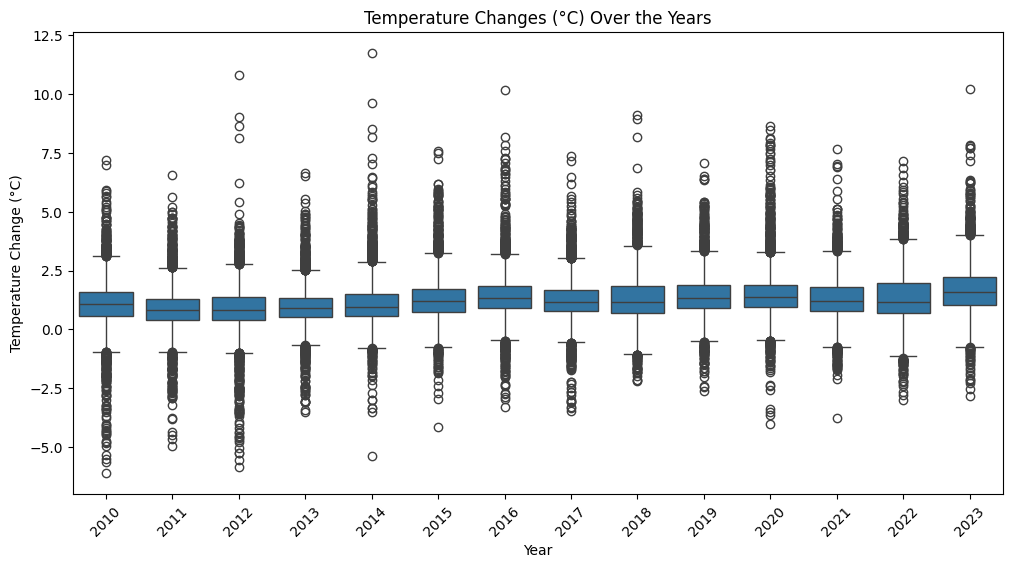

In [99]:
# Melt the dataset to convert year columns into a single 'YEAR' column
temp_melted = temp_change_df.melt(
    id_vars=['Area Code', 'Area', 'Months', 'Element'],
    value_vars=[col for col in temp_change_df.columns if col.startswith('Y')],
    var_name='YEAR',
    value_name='Temperature Change'
)

# Extract the year from 'YEAR' column
temp_melted['YEAR'] = temp_melted['YEAR'].str.extract(r'(\d{4})')

# Plot temperature changes to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='YEAR', y='Temperature Change', data=temp_melted)
plt.title('Temperature Changes (°C) Over the Years')
plt.xticks(rotation=45)
plt.ylabel('Temperature Change (°C)')
plt.xlabel('Year')
plt.show()

>The boxplot indicates some possble outliers as some regions had a yearly temperature change of over 10 degrees. However, given there appears to be a large number of data points outside the upper and lower range we should not filter out all data points outside of these ranges. We want to still capture extreme temperature changes as these could be a significant factor in food loss.

In [100]:
len(temp_melted)

49966

>Again, since the food balance data sheet is not broken down by month we will compute the average yearly temperature change for each country.

In [101]:
temp_melted.head()

,Area Code,Area,Months,Element,YEAR,Temperature Change
0,2,Afghanistan,January,Temperature change,2010,3.690
1,2,Afghanistan,February,Temperature change,2010,1.313
2,2,Afghanistan,March,Temperature change,2010,3.559
3,2,Afghanistan,April,Temperature change,2010,2.670
4,2,Afghanistan,May,Temperature change,2010,1.550


In [102]:
temp_avg_df = temp_melted.groupby(['Area Code', 'Area', 'Element', 'YEAR'])['Temperature Change'].mean().reset_index()

In [103]:
temp_avg_df = temp_avg_df.drop(columns='Element', axis=0)

In [104]:
temp_avg_df.head()

,Area Code,Area,YEAR,Temperature Change
0,1,Armenia,2010,2.831824
1,1,Armenia,2011,0.351824
2,1,Armenia,2012,1.388588
3,1,Armenia,2013,1.086000
4,1,Armenia,2014,1.593529


>Now we can move on to the crop yield data.

### D. Crop and Livestock Data

#### Exploring, Cleaning, and Transforming Crop Data

In [105]:
crop_yield_df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,0.0,...,13703.0,14676.0,19481.0,19793.0,20053.0,29203.0,22134.0,36862.0,36462.0,37000.0
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5412,Yield,kg/ha,NaN,...,1999.6,1652.1,1685.9,1378.8,1716.1,1308.3,1775.9,1743.2,1742.0,1810.8
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,t,0.0,...,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0,64256.0,63515.0,67000.0
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,ha,NaN,...,30000.0,25000.0,24500.0,26160.0,25220.0,25293.0,25558.0,25357.0,25403.0,25439.0
4,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5412,Yield,kg/ha,NaN,...,716.7,720.0,707.5,697.0,708.0,704.1,703.0,705.0,704.0,704.0


In [106]:
# Filter for only the production element
crop_yield_df = crop_yield_df[crop_yield_df['Element'] == 'Production']

In [107]:
crop_yield_df = drop_regions(crop_yield_df)

In [108]:
# Check to ensure all units are the same
crop_yield_df['Unit'].unique()

array(['t', '1000 No'], dtype=object)

>Since we want to focus on crops and not livestock, we will filter for rows with the unit listed as 't' for tonnes. We will also want to focus on the production element as this is the product of the area hearvested and kilograms produced per hectare (kg/ha).

In [109]:
crop_yield_df = crop_yield_df[crop_yield_df['Unit'] == 't']

In [110]:
crop_yield_df = crop_yield_df[crop_yield_df['Element'] == 'Production']

In [111]:
# Filter for columns
crop_yield_df = crop_yield_df[[
    'Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item', 'Unit', 'Element',
    'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 
    'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
    'Y2022', 'Y2023']]

In [112]:
crop_yield_df.describe()

,Area Code,Item Code,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
count,23816.000000,23816.000000,2.001300e+04,2.004200e+04,2.008900e+04,2.011600e+04,2.030000e+04,2.033200e+04,2.036200e+04,2.042000e+04,2.032900e+04,2.034100e+04,2.037100e+04,2.047700e+04,2.049600e+04,1.684100e+04
mean,132.184918,866.451671,1.102428e+06,1.156279e+06,1.166812e+06,1.210079e+06,1.223432e+06,1.234079e+06,1.247524e+06,1.267961e+06,1.281015e+06,1.298059e+06,1.301018e+06,1.317601e+06,1.330034e+06,1.587628e+06
std,77.709137,1411.941692,1.274208e+07,1.327048e+07,1.336110e+07,1.397079e+07,1.392025e+07,1.439908e+07,1.464424e+07,1.450198e+07,1.469856e+07,1.484877e+07,1.488503e+07,1.501046e+07,1.516544e+07,1.746961e+07
min,1.000000,15.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,64.000000,334.000000,1.242850e+03,1.262178e+03,1.260000e+03,1.278000e+03,1.236390e+03,1.254750e+03,1.288533e+03,1.290932e+03,1.036090e+03,1.064330e+03,1.051000e+03,1.030000e+03,1.052630e+03,1.003450e+03
50%,129.000000,619.000000,1.383940e+04,1.428585e+04,1.426403e+04,1.444615e+04,1.435801e+04,1.460202e+04,1.495215e+04,1.495000e+04,1.421707e+04,1.440000e+04,1.437600e+04,1.431800e+04,1.440235e+04,1.499801e+04
75%,198.000000,1036.000000,1.222400e+05,1.245001e+05,1.260700e+05,1.275580e+05,1.282728e+05,1.297530e+05,1.309318e+05,1.333223e+05,1.343530e+05,1.349621e+05,1.380835e+05,1.356445e+05,1.361280e+05,1.539097e+05
max,351.000000,17530.000000,7.174638e+08,7.340061e+08,7.210773e+08,7.680904e+08,7.361085e+08,7.502903e+08,7.685942e+08,7.586462e+08,7.475568e+08,7.534705e+08,7.560706e+08,7.156793e+08,7.260527e+08,7.825858e+08


>Descriptive statistics lists a minimum of 0 for production. We will inspect the data to determine if those entries are outliers.

In [113]:
crop_yield_df[crop_yield_df['Y2022'] == 0]

,Area Code,Area Code (M49),Area,Item Code,Item,Unit,Element,Y2010,Y2011,Y2012,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
1591,9,'032,Argentina,339,"Other oil seeds, n.e.c.",t,Production,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
2493,11,'040,Austria,572,Avocados,t,Production,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.0,0.0
2495,11,'040,Austria,486,Bananas,t,Production,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.0,0.0
2517,11,'040,Austria,899,"Buttermilk, dry",t,Production,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,4697.42,4452.65,0.0,0.0,NaN
2549,11,'040,Austria,329,Cotton seed,t,Production,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57033,230,'804,Ukraine,261,Olive oil,t,Production,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN
57067,230,'804,Ukraine,257,Palm oil,t,Production,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN
58188,231,'840,United States of America,550,Currants,t,Production,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
58250,231,'840,United States of America,1097,"Horse meat, fresh or chilled",t,Production,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0


>A country like Austria reports no production of avocados for all years. Internet research determines that Austria does not produce avocados but [does import them](https://www.freshelaexporters.com/avocado/prices/austria#:~:text=Austria%20heavily%20imports%20avocado%20for,high%20as%2027%C2%B0C.). The same applies to the United States and horse meat. [Horse meat production is prohibited in the U.S.](https://pmc.ncbi.nlm.nih.gov/articles/PMC2034431/). Since these are not outliers, data will be kept in the dataframe and NaN values will be replaced with 0.

In [114]:
crop_yield_df = crop_yield_df.fillna(0)

>Now we will transform this dataframe so that the production number is its own column along with the year and associated crop.

In [115]:
# Melt the dataset to convert year columns into a single 'YEAR' column
crop_melted = crop_yield_df.melt(
    id_vars=['Area Code', 'Area', 'Item Code', 'Item', 'Element'],
    value_vars=[col for col in crop_yield_df.columns if col.startswith('Y')],
    var_name='YEAR',
    value_name='Production'
)

# Extract the year from 'YEAR' column
crop_melted['YEAR'] = crop_melted['YEAR'].str.extract(r'(\d{4})')

In [116]:
crop_yield = crop_melted.drop(columns='Element', axis=0)

In [117]:
crop_yield.head()

,Area Code,Area,Item Code,Item,YEAR,Production
0,2,Afghanistan,221,"Almonds, in shell",2010,56000.0
1,2,Afghanistan,711,"Anise, badian, coriander, cumin, caraway, fenn...",2010,10200.0
2,2,Afghanistan,515,Apples,2010,59850.0
3,2,Afghanistan,526,Apricots,2010,66560.0
4,2,Afghanistan,44,Barley,2010,437000.0


>Next we will explore and process the cropland nutrient data.

### E. Cropland Nutrient Data

#### Exploring, Cleaning and Transforming Nutrient Data

In [118]:
crop_nutrient_df.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2,'004,Afghanistan,5087,Mineral fertilizers,7275,Cropland nitrogen,t,1000.0000,1000.0000,...,35901.8950,65036.4200,86007.9850,102635.4250,174737.9250,114955.0000,81496.0050,45920.8150,31770.8300,32967.7800
1,2,'004,Afghanistan,5087,Mineral fertilizers,7276,Cropland nitrogen per unit area,kg/ha,0.1290,0.1282,...,4.5388,8.2221,10.8733,12.9754,22.0908,14.3514,10.1743,5.7037,3.9462,4.0949
2,2,'004,Afghanistan,5087,Mineral fertilizers,7280,Cropland phosphorus,t,43.6000,43.6000,...,1028.9665,1748.6543,4269.9377,4619.6969,8557.9584,7069.8054,11327.6768,10410.8908,2809.5426,5065.6333
3,2,'004,Afghanistan,5087,Mineral fertilizers,7281,Cropland phosphorus per unit area,kg/ha,0.0056,0.0056,...,0.1301,0.2211,0.5398,0.5840,1.0819,0.8826,1.4142,1.2931,0.3490,0.6292
4,2,'004,Afghanistan,5087,Mineral fertilizers,7282,Cropland potassium,t,83.0000,83.0000,...,78.0657,85.7681,67.1636,71.2679,96.0642,1.2326,41.5000,136.0246,291.1101,250.5231


>For this dataframe, we will focus on the tonnes metric and not kg/ha.

In [119]:
# Filter for columns
crop_nutrient_df = crop_nutrient_df[[
    'Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item', 'Element', 'Unit',
    'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 
    'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
    'Y2022']]

In [120]:
# Filter for tonnes
crop_nutrient_df = crop_nutrient_df[crop_nutrient_df['Unit'] == 't']

In [121]:
crop_nutrient_df['Item'].unique()

array(['Mineral fertilizers', 'Manure applied to Soils',
       'Atmospheric Deposition', 'Crop Removal', 'Biological Fixation',
       'Seed', 'Leaching', 'Volatilisation', 'Input', 'Outputs',
       'Nutrient balance'], dtype=object)

In [122]:
# Filter for nutrient balance item
crop_nutrient_df = crop_nutrient_df[crop_nutrient_df['Item'] == 'Nutrient balance']

In [123]:
# Drop areas that span mulitple regions
crop_nutrient_df = drop_regions(crop_nutrient_df)

In [124]:
crop_nutrient_df.tail()

,Area Code,Area Code (M49),Area,Item Code,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
10296,251,'894,Zambia,5081,Nutrient balance,Cropland phosphorus,t,-5081.1483,-272.1223,-799.1196,5525.0430,6011.8106,8067.9773,6126.6433,3066.3837,7476.8918,14843.2973,13741.2229,7648.7461,12474.5265
10298,251,'894,Zambia,5081,Nutrient balance,Cropland potassium,t,-6631.7243,-6037.9608,-7436.2680,-7697.9284,-6970.9770,-4705.2829,-6998.2499,-9061.8576,-455.0738,15323.7009,20139.9184,638.8011,8093.9184
10347,181,'716,Zimbabwe,5081,Nutrient balance,Cropland nitrogen,t,60293.1910,59039.2525,36002.8711,42612.3813,40760.9663,49759.9944,65530.8081,41212.0924,27500.0890,32567.6678,22764.7052,26578.3168,19207.9022
10349,181,'716,Zimbabwe,5081,Nutrient balance,Cropland phosphorus,t,7864.0322,7613.8705,2239.5812,6374.5332,5732.7154,7007.1561,14719.3443,5150.7553,4865.2050,12534.0399,13255.4103,15376.4376,3807.5044
10351,181,'716,Zimbabwe,5081,Nutrient balance,Cropland potassium,t,-40.6993,-1783.7867,-6084.4436,-675.5225,3437.6882,1203.2703,19542.1112,10566.4287,2527.4340,6256.3634,-2366.0230,-2673.5361,-6679.5875


In [125]:
# Check for null entries
crop_nutrient_df[crop_nutrient_df.isnull().any(axis=1)]

,Area Code,Area Code (M49),Area,Item Code,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
8708,277,'728,South Sudan,5081,Nutrient balance,Cropland nitrogen,t,NaN,NaN,53722.5380,56347.1668,51735.6023,48536.9757,50171.3501,51427.2388,58256.1246,57364.9657,57309.3921,58728.8973,56700.1106
8710,277,'728,South Sudan,5081,Nutrient balance,Cropland phosphorus,t,NaN,NaN,2475.4176,2351.6855,983.5425,2099.6326,2770.6366,3130.7729,3948.8588,3140.1997,2753.8523,2556.1830,1911.0168
8712,277,'728,South Sudan,5081,Nutrient balance,Cropland potassium,t,NaN,NaN,46824.6856,48630.5441,46401.8991,45954.5503,46957.7529,47673.5863,53083.2950,48071.4041,47564.9075,46171.3586,45758.2661
8867,276,'729,Sudan,5081,Nutrient balance,Cropland nitrogen,t,NaN,NaN,223317.7802,227228.4927,201405.4675,227701.6899,306187.3886,246910.7283,241069.9921,312166.9488,322754.3174,347304.7341,293162.6003
8869,276,'729,Sudan,5081,Nutrient balance,Cropland phosphorus,t,NaN,NaN,-2556.5348,-23791.0274,-19446.2762,-6320.0216,-30131.8126,-17492.6618,-28659.1202,-32251.3351,-25036.7484,-23976.3968,-29792.7357
8871,276,'729,Sudan,5081,Nutrient balance,Cropland potassium,t,NaN,NaN,26637.6123,7803.5593,-5389.1957,26582.1451,-6691.5374,-345.1839,-32208.5942,-11969.2989,-15933.1669,-4814.4542,-16959.9449


>Since there are only 6 rows that have null entries we will drop these.

In [126]:
crop_nutrient_df = crop_nutrient_df.dropna()
crop_nutrient_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 44 to 10351
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code        582 non-null    int64  
 1   Area Code (M49)  582 non-null    object 
 2   Area             582 non-null    object 
 3   Item Code        582 non-null    int64  
 4   Item             582 non-null    object 
 5   Element          582 non-null    object 
 6   Unit             582 non-null    object 
 7   Y2010            582 non-null    float64
 8   Y2011            582 non-null    float64
 9   Y2012            582 non-null    float64
 10  Y2013            582 non-null    float64
 11  Y2014            582 non-null    float64
 12  Y2015            582 non-null    float64
 13  Y2016            582 non-null    float64
 14  Y2017            582 non-null    float64
 15  Y2018            582 non-null    float64
 16  Y2019            582 non-null    float64
 17  Y2020            5

In [127]:
crop_nutrient_df['Element'].unique()

array(['Cropland nitrogen', 'Cropland phosphorus', 'Cropland potassium'],
      dtype=object)

>There are **three** unique minerals in this dataset.

In [128]:
# Melt the dataset to convert year columns into a single 'YEAR' column
crop_melted = crop_nutrient_df.melt(
    id_vars=['Area Code', 'Area', 'Item Code', 'Item', 'Element'],
    value_vars=[col for col in crop_nutrient_df.columns if col.startswith('Y')],
    var_name='YEAR',
    value_name='Mineral'
)

crop_melted['YEAR'] = crop_melted['YEAR'].str.extract(r'(\d{4})')

In [129]:
# Pivot to have three different minerals as separate columns
crop_nutrient_pivot = crop_melted.pivot_table(
    index=['Area Code', 'Area', 'YEAR'],
    columns='Element',
    values='Mineral',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Flatten column names
crop_nutrient_pivot.columns.name = None

# Rename columns for clarity
crop_nutrient_pivot.rename(columns={
    'Cropland nitrogen': 'Nitrogen',
    'Cropland potassium': 'Potassium',
    'Cropland phosphorus': 'Phosphorus'
}, inplace=True)

In [130]:
crop_nutrient_pivot.head()

,Area Code,Area,YEAR,Nitrogen,Phosphorus,Potassium
0,1,Armenia,2010,21109.1266,-1138.5027,-4151.8274
1,1,Armenia,2011,21262.5433,-1598.1136,-5934.0518
2,1,Armenia,2012,31092.5024,-1990.1189,-6511.1837
3,1,Armenia,2013,32269.2974,-2035.8121,-6926.9625
4,1,Armenia,2014,26500.4743,-1723.9003,-6794.5826


>Now that the dataframe has been transformed we can review summary statistics.

In [131]:
crop_nutrient_pivot.iloc[:, 1:].describe()

,Nitrogen,Phosphorus,Potassium
count,2.522000e+03,2.522000e+03,2.522000e+03
mean,5.596797e+05,6.264996e+04,9.059575e+04
std,2.753194e+06,3.994203e+05,5.750279e+05
min,-2.338546e+05,-3.980614e+05,-1.912950e+06
25%,3.951340e+03,-4.116898e+02,-4.765454e+03
50%,3.438199e+04,8.142032e+02,1.021341e+03
75%,1.695875e+05,1.197439e+04,3.616961e+04
max,2.802541e+07,4.880765e+06,6.920151e+06


>Descriptive statistics do not indicate outliers. Negative numbers are not errors in the data as negative nutrient balance indicates a [nutrient deficit](https://openknowledge.fao.org/server/api/core/bitstreams/9edfb85d-155c-4218-8c1f-aa7fca6a05c3/content). Large variation is also expected due to the difference in inputs and outputs for countries of varying sizes.

In [132]:
correlation_matrix = crop_nutrient_pivot[['Nitrogen', 'Phosphorus', 'Potassium']].corr()

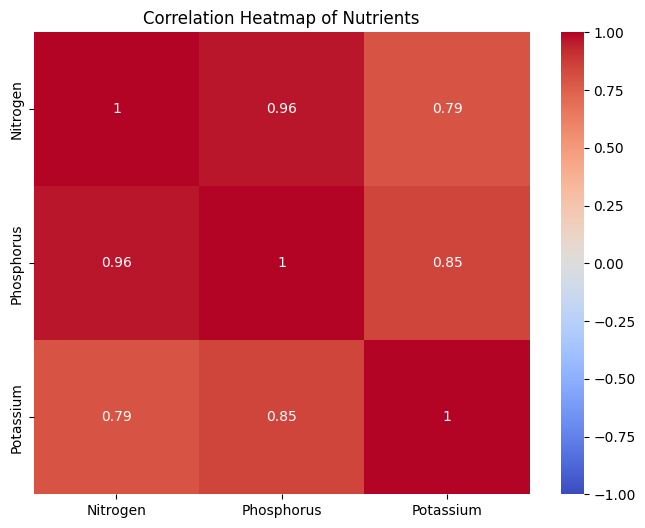

In [133]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Nutrients')
plt.show()

>There is a strong correlation between minerals with the strongest correlation being between nitrogen and phosphorus. If one nutrient is depleted or enhanced, it might reflect on others. Adjusting fertilizer balance may be crucial to maintaining optimal levels of all three.

>Lastly, we will explore and clean the pesticide data.

### F. Pesticide Data

#### Exploring, Cleaning and Transforming Pesticide Data

In [134]:
pest_df.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y1990,Y1991,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,3,'008,Albania,1357,Pesticides (total),5157,Agricultural Use,t,121.00,121.00,...,450.60,457.47,538.24,584.49,614.91,442.35,746.36,401.58,433.30,295.61
1,3,'008,Albania,1357,Pesticides (total),5159,Use per area of cropland,kg/ha,0.17,0.17,...,0.65,0.66,0.77,0.83,0.88,0.64,1.07,0.58,0.63,0.43
2,3,'008,Albania,1357,Pesticides (total),5172,Use per capita,kg/cap,0.04,0.04,...,0.16,0.16,0.19,0.20,0.21,0.15,0.26,0.14,0.15,0.10
3,3,'008,Albania,1357,Pesticides (total),5173,Use per value of agricultural production,g/Int$,0.12,NaN,...,0.23,0.23,0.26,0.27,0.29,0.20,0.35,0.18,0.20,0.14
4,3,'008,Albania,1309,Insecticides,5157,Agricultural Use,t,70.00,70.00,...,215.73,93.49,155.46,189.88,201.99,128.66,151.13,45.49,44.95,36.72


In [135]:
# Filter for columns
pest_df = pest_df[[
    'Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item', 'Element', 'Unit',
    'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 
    'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
    'Y2022']]

In [136]:
print("Number of items:", len(pest_df['Item'].unique()))

Number of items: 36


In [137]:
pest_df['Item'].unique()

array(['Pesticides (total)', 'Insecticides',
       'Insecticides â\x80\x93 Chlorinated Hydrocarbons',
       'Insecticides â\x80\x93 Organo-phosphates',
       'Insecticides â\x80\x93 Carbamates',
       'Insecticides â\x80\x93 Pyrethroids', 'Insecticides - nes',
       'Herbicides', 'Herbicides â\x80\x93 Phenoxy hormone products',
       'Herbicides â\x80\x93 Triazines', 'Herbicides â\x80\x93 Amides',
       'Herbicides â\x80\x93 Carbamates',
       'Herbicides â\x80\x93 Dinitroanilines',
       'Herbicides â\x80\x93 Sulfonyl ureas',
       'Herbicides â\x80\x93 Bipiridils', 'Herbicides - nes',
       'Fungicides and Bactericides', 'Fung & Bact â\x80\x93 Inorganics',
       'Fung & Bact â\x80\x93 Dithiocarbamates',
       'Fung & Bact â\x80\x93 Benzimidazoles',
       'Fung & Bact â\x80\x93 Triazoles, diazoles', 'Fung & Bact - nes',
       'Plant Growth Regulators', 'Rodenticides',
       'Rodenticides â\x80\x93 Anti-coagulants',
       'Rodenticides â\x80\x93 Other', 'Other Pesticid

>There are **36** items for the types of pesticides used. Instead of using the total, we will use the unique categories across insecticides, herbicides, fungicides/bactericides, rodenticides, plant growth regulators instead of just the totals for each.

In [138]:
# Fix encoding error in formatting
pest_df['Item'] = pest_df['Item'].str.encode('latin1').str.decode('utf-8')

In [139]:
# Remove pest categories not needed
pest_to_filter = ['Pesticides (total)', 'Insecticides', 'Herbicides', 'Fungicides and Bactericides', 'Rodenticides']
new_pest_1 = pest_df[~pest_df['Item'].isin(pest_to_filter)]

In [140]:
new_pest_1['Element'].unique()

array(['Agricultural Use'], dtype=object)

>For the Element column of the pesticide data, we will utilize the agricultural use to get the total tonnes used.

In [141]:
new_pest_1 = drop_regions(new_pest_1)

In [142]:
# View null data
new_pest_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2724 entries, 5 to 4394
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code        2724 non-null   int64  
 1   Area Code (M49)  2724 non-null   object 
 2   Area             2724 non-null   object 
 3   Item Code        2724 non-null   int64  
 4   Item             2724 non-null   object 
 5   Element          2724 non-null   object 
 6   Unit             2724 non-null   object 
 7   Y2010            1103 non-null   float64
 8   Y2011            1146 non-null   float64
 9   Y2012            1199 non-null   float64
 10  Y2013            1287 non-null   float64
 11  Y2014            1276 non-null   float64
 12  Y2015            1182 non-null   float64
 13  Y2016            1260 non-null   float64
 14  Y2017            1342 non-null   float64
 15  Y2018            1304 non-null   float64
 16  Y2019            1383 non-null   float64
 17  Y2020            13

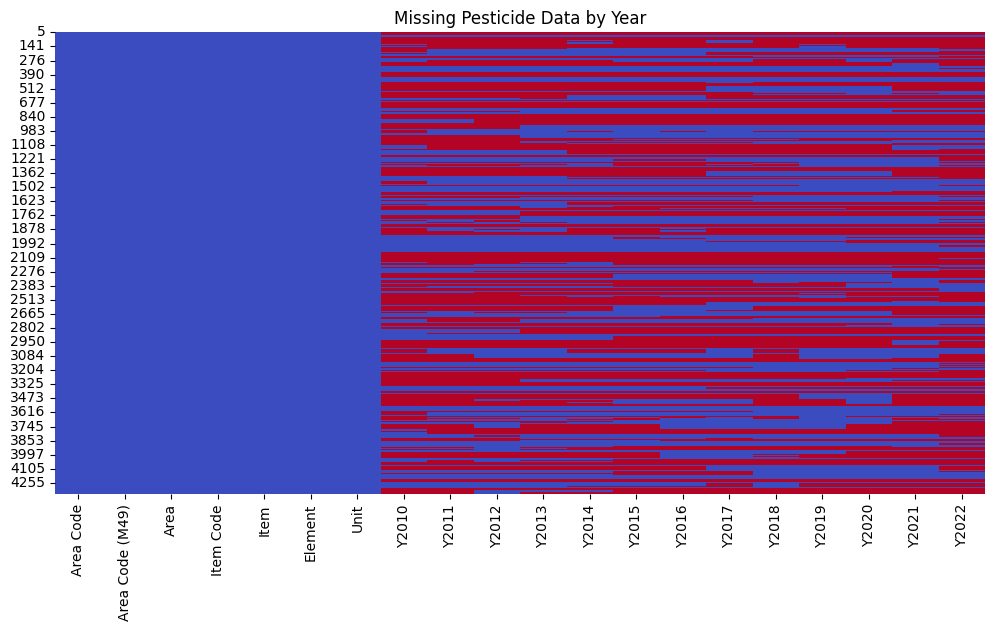

In [143]:
plt.figure(figsize=(12, 6))
sns.heatmap(new_pest_1.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Pesticide Data by Year')
plt.show()

In [144]:
print("Remaining rows if dropping data:", len(new_pest_1.dropna()))

Remaining rows if dropping data: 539


>There is a significant number of missing entries for all years. Every year has over 1000 missing entries. This could be due to lack of reporting or lack of specific pesticide use. Visualizaton of this data does not determine any pattern in the missing data. Dropping the null rows would leave us with only 539 entries. Since this cause cannot be determined we will try using the pesticide totals instead of individual types.

In [145]:
# Use the totals for categories
new_pest_2 = pest_df[pest_df['Item'].isin(['Pesticides (total)', 'Insecticides', 'Herbicides', 
                                           'Fungicides and Bactericides', 'Rodenticides', 'Plant owth Reulators'])]
new_pest_2 = drop_regions(new_pest_2)
new_pest_2 = new_pest_2[new_pest_2['Element'] == 'Agricultural Use']

In [146]:
new_pest_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1053 entries, 0 to 4392
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code        1053 non-null   int64  
 1   Area Code (M49)  1053 non-null   object 
 2   Area             1053 non-null   object 
 3   Item Code        1053 non-null   int64  
 4   Item             1053 non-null   object 
 5   Element          1053 non-null   object 
 6   Unit             1053 non-null   object 
 7   Y2010            1008 non-null   float64
 8   Y2011            1008 non-null   float64
 9   Y2012            1008 non-null   float64
 10  Y2013            1009 non-null   float64
 11  Y2014            1009 non-null   float64
 12  Y2015            1009 non-null   float64
 13  Y2016            1009 non-null   float64
 14  Y2017            1009 non-null   float64
 15  Y2018            1009 non-null   float64
 16  Y2019            1009 non-null   float64
 17  Y2020            10

In [147]:
print("Total rows with null:", len(new_pest_2[new_pest_2.isnull().any(axis=1)]))

Total rows with null: 56


>Since there are only 56 rows that are null we will drop this data. We will not use imputation due to variation of mineral usage across countries.

In [148]:
new_pest_2.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,3,'008,Albania,1357,Pesticides (total),Agricultural Use,t,590.50,582.68,361.62,450.60,457.47,538.24,584.49,614.91,442.35,746.36,401.58,433.30,295.61
4,3,'008,Albania,1309,Insecticides,Agricultural Use,t,377.85,320.61,162.77,215.73,93.49,155.46,189.88,201.99,128.66,151.13,45.49,44.95,36.72
10,3,'008,Albania,1320,Herbicides,Agricultural Use,t,6.91,19.70,9.77,22.33,27.65,67.85,33.66,56.17,65.89,117.09,43.67,39.82,32.02
19,3,'008,Albania,1331,Fungicides and Bactericides,Agricultural Use,t,188.68,208.77,177.64,182.67,277.78,236.65,232.42,241.70,198.96,352.06,228.24,248.54,110.44
26,3,'008,Albania,1345,Rodenticides,Agricultural Use,t,9.30,24.48,0.59,18.48,47.78,68.13,117.45,103.04,35.89,60.70,28.61,25.01,25.01


In [149]:
# Melt the dataset to convert year columns into a single 'YEAR' column
pest_melted = new_pest_2.melt(
    id_vars=['Area Code', 'Area', 'Item Code', 'Item'],
    value_vars=[col for col in new_pest_2.columns if col.startswith('Y')],
    var_name='YEAR',
    value_name='Pesticide'
)

pest_melted['YEAR'] = pest_melted['YEAR'].str.extract(r'(\d{4})')

In [150]:
pest_melted

,Area Code,Area,Item Code,Item,YEAR,Pesticide
0,3,Albania,1357,Pesticides (total),2010,590.50
1,3,Albania,1309,Insecticides,2010,377.85
2,3,Albania,1320,Herbicides,2010,6.91
3,3,Albania,1331,Fungicides and Bactericides,2010,188.68
4,3,Albania,1345,Rodenticides,2010,9.30
...,...,...,...,...,...,...
13684,181,Zimbabwe,1357,Pesticides (total),2022,2185.07
13685,181,Zimbabwe,1309,Insecticides,2022,1099.49
13686,181,Zimbabwe,1320,Herbicides,2022,549.41
13687,181,Zimbabwe,1331,Fungicides and Bactericides,2022,360.00


>The last transformation will be pivoting this data so that the pesticide categories are columns.

In [151]:
# Pivot to have three different minerals as separate columns
pest_pivot = pest_melted.pivot_table(
    index=['Area Code', 'Area', 'YEAR'],
    columns='Item',
    values='Pesticide',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Flatten column names
pest_pivot.columns.name = None

In [152]:
# Drop the pesticides (total) column since it is a sum of all the other columns
pest_pivot.drop(columns='Pesticides (total)', inplace=True)
pest_pivot.head()

,Area Code,Area,YEAR,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
0,1,Armenia,2010,136.80,56.81,51.95,33.16
1,1,Armenia,2011,157.65,64.55,65.41,31.17
2,1,Armenia,2012,178.50,72.28,78.87,29.19
3,1,Armenia,2013,199.36,80.02,92.33,27.20
4,1,Armenia,2014,220.21,87.75,105.79,25.22


>Now that we have processed all **6** dataframes, we will export the dataframes as CSV files to begin building a machine learning model in a new notebook.

In [153]:
# Export all data
food_balance_final.to_csv("cleaned_data/food_balance_data.csv", index=False)
cpi_pivot.to_csv("cleaned_data/cpi_data.csv", index=False)
temp_avg_df.to_csv("cleaned_data/temp_data.csv", index=False)
crop_yield.to_csv("cleaned_data/crop_yield_data.csv", index=False)
crop_nutrient_pivot.to_csv("cleaned_data/nutrient_data.csv", index=False)
pest_pivot.to_csv("cleaned_data/pesticide_data.csv", index=False)